In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

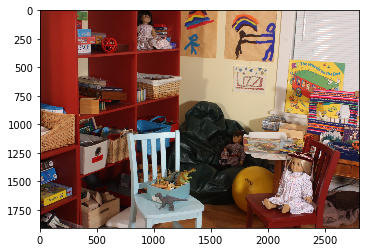

In [12]:
img_left = cv2.imread(r'images/left_image.png')
img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2RGB)
plt.imshow(img_left);

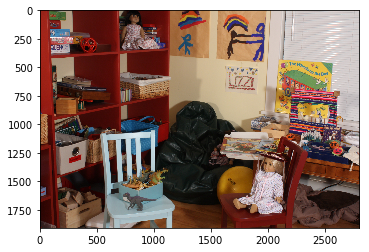

In [13]:
img_right = cv2.imread(r'images/right_image.png')
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2RGB)
plt.imshow(img_right);

## Matching Patch and Strip

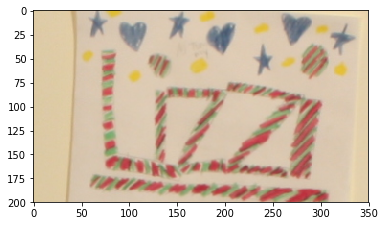

In [20]:
left_patch = img_left[500:700, 1650:2000]
plt.imshow(left_patch);

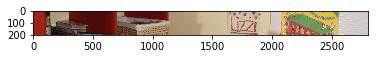

In [27]:
right_strip = img_right[500:700, :]
plt.imshow(right_strip);

### Using Custom Function

In [180]:
def find_best_match(strip, patch):
    patch_width = patch.shape[1]
    patch_height = patch.shape[0]
    last_multiple = strip.shape[1]//patch_width
    min_diff = float('inf')
    loc = (0, 0)
    last_index = (patch_width*last_multiple) - patch_width
    for x in range(last_index+1):
        temp_patch = strip[:, x:x+patch_width]
        diff = np.sum((temp_patch - patch)**2)
        if diff < min_diff:
            min_diff = diff
            loc = (x, 0)

    top_left = (loc[0]-patch_width, 0)
    bottom_right = (top_left[0]+patch_width, top_left[1]+patch_height)
    strip_copy = cv2.rectangle(strip.copy(), top_left, bottom_right, 255, 6)
    plt.figure(figsize=(10, 5))
    # Both need to be uint8,  if both are float64 then divide by 255
    patch_img = np.hstack(
        (patch, np.zeros((patch_height, last_index, 3), dtype = np.uint8)))
    plt.imshow(np.vstack((patch_img, strip_copy, strip)))

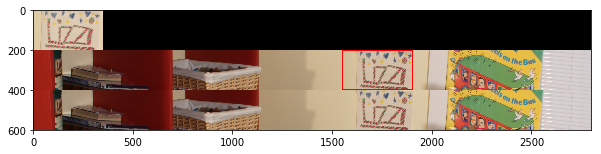

In [181]:
find_best_match(right_strip, left_patch)

### Using Opencv matchTemplate

In [38]:
res = cv2.matchTemplate(right_strip, left_patch, method = cv2.TM_SQDIFF)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(res)

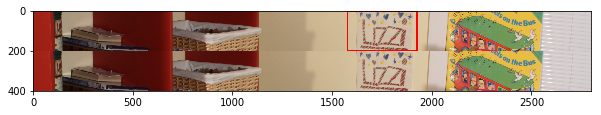

In [57]:
top_left = minLoc
patch_width = left_patch.shape[1]
patch_height = left_patch.shape[0]
bottom_right = (minLoc[0]+patch_width,minLoc[1]+patch_height)
right_copy = right_strip.copy()
right_copy = cv2.rectangle(right_copy, top_left, bottom_right, 255, 6)
plt.figure(figsize = (10, 5))
plt.imshow(np.vstack((right_copy, right_strip)))

## Matching Strip and Strip